In [1]:
from ema_workbench import (Model, RealParameter,CategoricalParameter, IntegerParameter, TimeSeriesOutcome, ema_logging, perform_experiments)
# from ema_workbench.connectors.excel import ExcelModel
from ema_workbench.em_framework.evaluators import MultiprocessingEvaluator
from ema_workbench.em_framework.outcomes import ArrayOutcome, ScalarOutcome
from ema_workbench.util import ema_exceptions
#from ema_workbench.analysis.plotting import lines
from ema_workbench.analysis import pairs_plotting
#feature scoring
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis import prim
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 
from pandas.core.indexing import convert_missing_indexer, convert_to_index_sliceable
import os 
import warnings
from math import floor
from ema_workbench.analysis import dimensional_stacking
from scipy import stats

# Change the current working directory
os.chdir('C:\\Users\\wb558960\\OneDrive - WBG\\CCDRs LAC\\Argentina\\DeepDives\\Vaca Muerta\\Python\\src')
#print("Current working directory: {0}".format(os.getcwd()))

In [2]:
indir = "C:\\Users\\wb558960\\OneDrive - WBG\\CCDRs LAC\\Argentina\\DeepDives\\Vaca Muerta\\Python\\outputs_rdm\\outputs_v5\\n_1000\\"
outdir ='C:\\Users\\wb558960\\OneDrive - WBG\\CCDRs LAC\\Argentina\\DeepDives\\Vaca Muerta\\Python\\outputs_rdm\\plots\\'

In [3]:
colnames= ['year','run','Conv_gas_price','Unconv_gas_price','Conv_oil_price','Unconv_oil_price',
'Conv_gas_ds_capex','Unconv_gas_ds_capex','Conv_oil_ds_capex','Unconv_oil_ds_capex',
'Conv_gas_opex','Unconv_gas_opex','Conv_oil_opex','Unconv_oil_opex',
'Conv_gas_domestic revenue','Unconv_gas_domestic revenue','Conv_oil_domestic revenue','Unconv_oil_domestic revenue',
'Conv_gas_export revenue','Unconv_gas_export revenue','Conv_oil_export revenue','Unconv_oil_export revenue',
'Conv_gas_production subsidy','Unconv_gas_production subsidy','Conv_oil_production subsidy','Unconv_oil_production subsidy',
'Conv_gas_import subsidy','Unconv_gas_import subsidy','Conv_oil_import subsidy','Unconv_oil_import subsidy',
'Conv_gas_royalties','Unconv_gas_royalties','Conv_oil_royalties','Unconv_oil_royalties',
'Conv_gas_export duties','Unconv_gas_export duties','Conv_oil_export duties','Unconv_oil_export duties',
'Conv_gas_trade balance','Unconv_gas_trade balance','Conv_oil_trade balance','Unconv_oil_trade balance',
'Conv_gas_us_capex','Unconv_gas_us_capex','Conv_oil_us_capex','Unconv_oil_us_capex',
'Conv_gas_starts','Unconv_gas_starts','Conv_oil_starts','Unconv_oil_starts',
'Conv_gas_discount_factor','Unconv_gas_discount_factor','Conv_oil_discount_factor','Unconv_oil_discount_factor']


In [4]:
outcomes = pd.read_csv(indir+"vm_outcomes_2.csv")
experiments = pd.read_csv(indir+"vm_experiments_2.csv")
tradebal= pd.read_csv(indir+"fiscal ts outcomes_2.csv",index_col = False,names = colnames, skiprows = 1 )
physbal = pd.read_csv(indir+"physical ts outcomes_2.csv" )

In [5]:
fbal = tradebal.groupby('run').sum()
fbal=fbal/383100000000*100

# pbal =  physbal.groupby('run').mean()
# print(pbal.head())

In [6]:
data = pd.merge(outcomes, experiments)
data = data.rename(columns= {'Unnamed: 0':'run'}).set_index('run')
data = pd.merge(data,fbal, left_on = 'run',right_on= 'run')

In [7]:
data.columns

Index(['npv_gdp', 'npv_unsub_gdp', 'total_ft_gdp', 'wells_total',
       'gdp_npv_conv_gas', 'gdp_npv_conv_oil', 'gdp_npv_unconv_gas',
       'gdp_npv_unconv_oil', 'gdp_ft_conv_gas', 'gdp_ft_conv_oil',
       ...
       'Conv_oil_us_capex', 'Unconv_oil_us_capex', 'Conv_gas_starts',
       'Unconv_gas_starts', 'Conv_oil_starts', 'Unconv_oil_starts',
       'Conv_gas_discount_factor', 'Unconv_gas_discount_factor',
       'Conv_oil_discount_factor', 'Unconv_oil_discount_factor'],
      dtype='object', length=123)

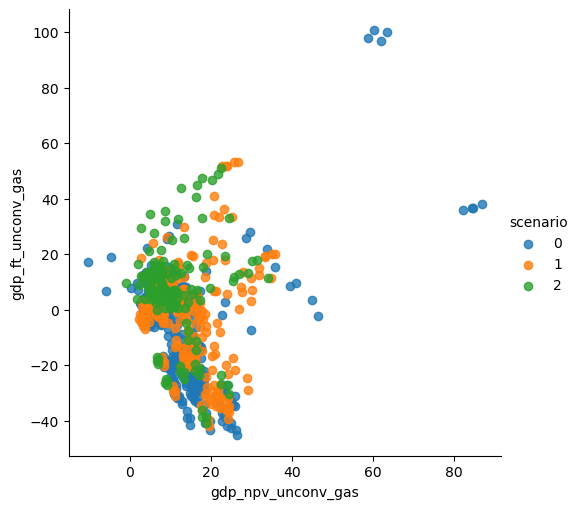

In [8]:
#define scenario
#&(data['t_rate_gas'] > .003)&

data.scenario = 0 
data.loc[(data['rcp'] =='CURR')&(data['wells_total'] >=16000), 'scenario'] =0
data.loc[(data['rcp'] =='1.5')&(data['wells_total'] >=16000), 'scenario'] =1
data.loc[(data['rcp'] =='1.5')&(data['wells_total'] <16000), 'scenario'] = 2

plot = sns.lmplot(x="gdp_npv_unconv_gas", y="gdp_ft_unconv_gas", data=data, fit_reg=False, hue='scenario', legend=True)
plt.show()

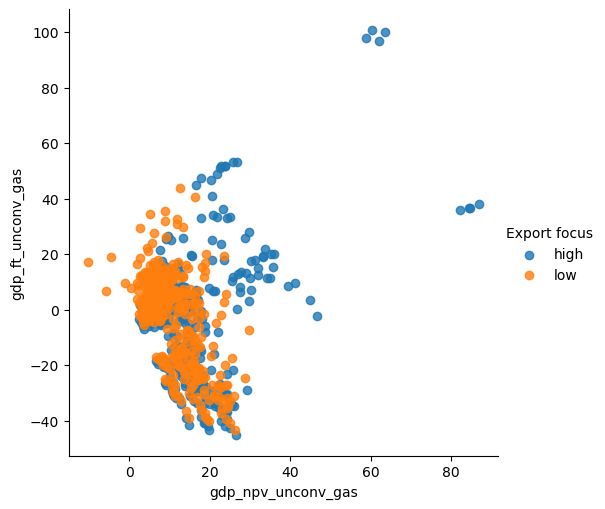

In [16]:
data.scenario = 0 


plot = sns.lmplot(x="gdp_npv_unconv_gas", y="gdp_ft_unconv_gas", data=data, fit_reg=False, hue='Export focus', legend=True)
plt.show()

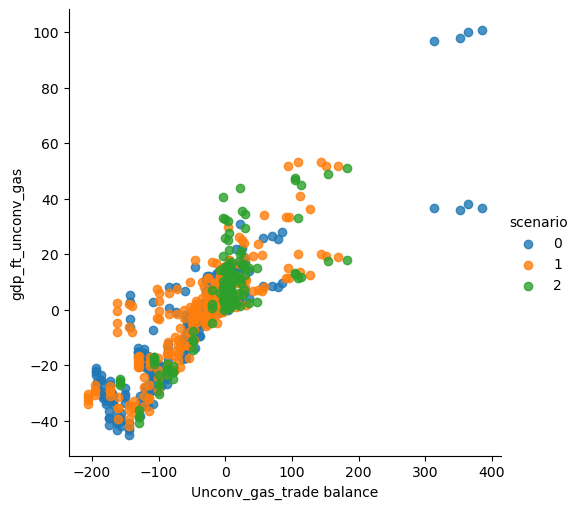

In [21]:
data.scenario = 0 
data.loc[(data['rcp'] =='CURR')&(data['wells_total'] >=16000), 'scenario'] =0
data.loc[(data['rcp'] =='1.5')&(data['wells_total'] >=16000), 'scenario'] =1
data.loc[(data['rcp'] =='1.5')&(data['wells_total'] <16000), 'scenario'] = 2

plot = sns.lmplot(x="Unconv_gas_trade balance", y="gdp_ft_unconv_gas", data=data, fit_reg=False, hue='scenario', legend=True)
plt.show()

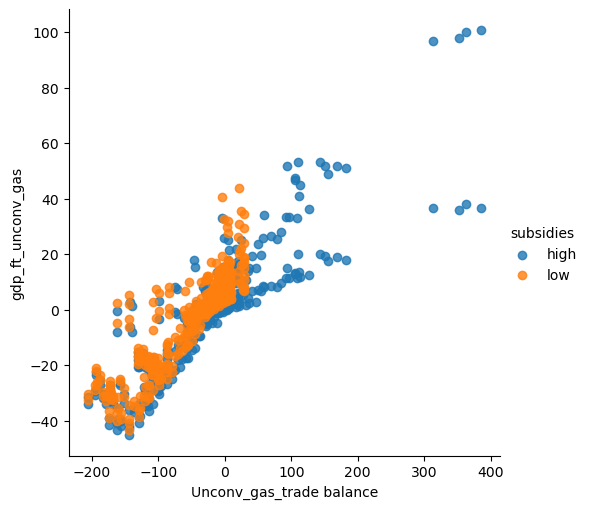

In [27]:
plot = sns.lmplot(x="Unconv_gas_trade balance", y="gdp_ft_unconv_gas", data=data, fit_reg=False, hue='subsidies', legend=True)
plt.show()

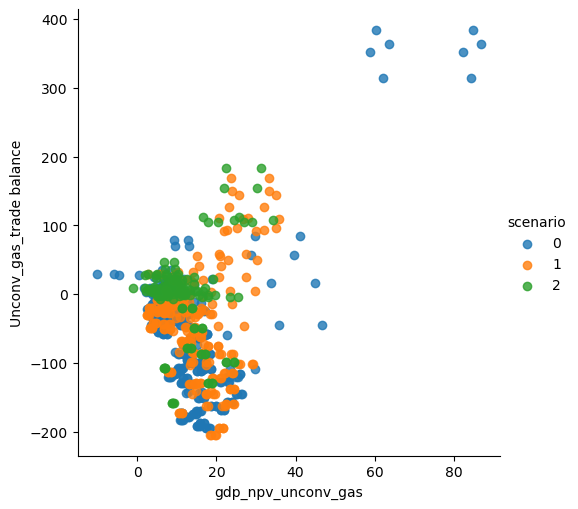

In [28]:
plot = sns.lmplot(x="gdp_npv_unconv_gas", y="Unconv_gas_trade balance", data=data, fit_reg=False, hue='scenario', legend=True)
plt.show()

In [29]:
#define success

data.loc[(data['gdp_npv_unconv_gas'] >0)&(data['gdp_ft_unconv_gas'] >0)&(data['Unconv_gas_trade balance'] >0), 'success3'] ="Positive Impacts"
data.loc[(data['gdp_npv_unconv_gas'] <0)|(data['gdp_ft_unconv_gas'] <0)|(data['Unconv_gas_trade balance'] <0), 'success3'] ="Negative Impacts"

data.loc[(data['gdp_npv_unconv_gas'] >0)&(data['gdp_ft_unconv_gas'] >0), 'success_ft'] =1
data.loc[(data['gdp_npv_unconv_gas'] <0)|(data['gdp_ft_unconv_gas'] <0), 'success_ft'] =0

data.loc[(data['Unconv_gas_trade balance'] >0)&(data['gdp_npv_unconv_gas'] >0), 'success_tb'] =1
data.loc[(data['Unconv_gas_trade balance'] <0)|(data['gdp_npv_unconv_gas'] <0), 'success_tb'] =0

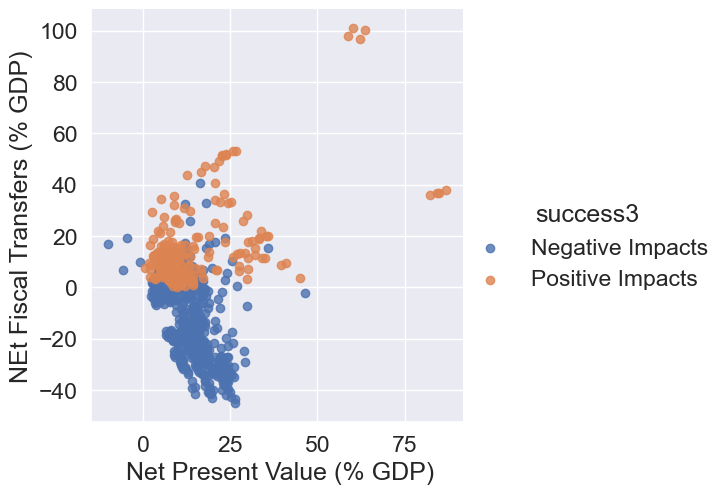

In [30]:
#add legend and axis labels here
sns.set(font_scale = 1.5)
plot = sns.lmplot(x="gdp_npv_unconv_gas", y="gdp_ft_unconv_gas", data=data, fit_reg=False, hue='success3', legend=True)
plot.set_titles("Impacts of Vaca Muerta")  # use this argument literally
plot.set_axis_labels(x_var=" Net Present Value (% GDP)", y_var="NEt Fiscal Transfers (% GDP)")

plt.show()

In [31]:
pd.crosstab(data['scenario'],data['success_ft'])


success_ft,0.0,1.0
scenario,,
0,217,183
1,122,124
2,31,123


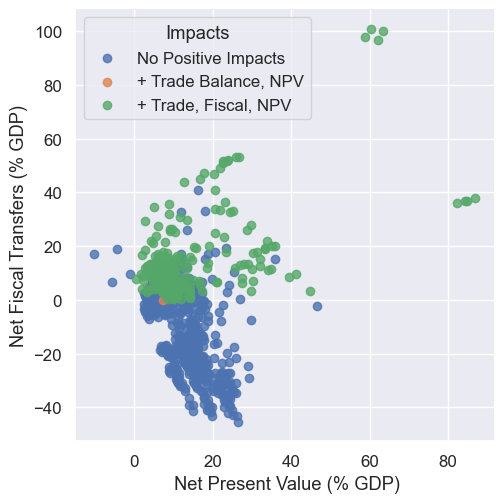

In [33]:
#graph for executive Summary

data.loc[(data['gdp_npv_unconv_gas'] <0)|(data['gdp_ft_unconv_gas'] <0)|(data['Unconv_gas_trade balance'] <0), 'three_level'] = 0
data.loc[(data['Unconv_gas_trade balance'] >0)&(data['gdp_npv_unconv_gas'] >0), 'three_level'] =1
data.loc[(data['gdp_npv_unconv_gas'] >0)&(data['gdp_ft_unconv_gas'] >0)&(data['Unconv_gas_trade balance'] >0), 'three_level'] =2

sns.set(font_scale = 1.1)
plot = sns.lmplot(x="gdp_npv_unconv_gas", y="gdp_ft_unconv_gas", data=data, fit_reg=False, hue='three_level', legend=True, legend_out = False)
plot.set_titles("Impacts of Vaca Muerta")  # use this argument literally
plot.set_axis_labels(x_var=" Net Present Value (% GDP)", y_var="Net Fiscal Transfers (% GDP)")
# plt.legend(title='Impacts', loc='upper left', labels=['No Positive Impacts', '+ Trade Balance and NPV Impacts','+ Trade Balance, Fiscal, NPV Impacts'])
new_title = 'Impacts'
plot._legend.set_title(new_title)
# replace labels
new_labels = ['No Positive Impacts', '+ Trade Balance, NPV','+ Trade, Fiscal, NPV']
for t, l in zip(plot._legend.texts, new_labels):
    t.set_text(l)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

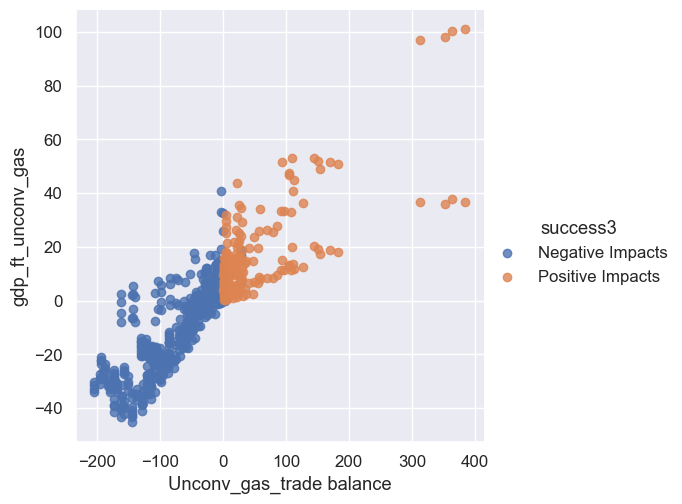

In [34]:
#do trade and fiscal impact on the axis - then color by npv

# data["gdp_npv_unconv_gas"]
plot = sns.lmplot(x="Unconv_gas_trade balance", y="gdp_ft_unconv_gas", data=data, fit_reg=False, hue='success3', legend=True)
plt.show()

# 

In [38]:
print(pd.Series.corr(data['scenario'],data['success_tb']))

0.31965315712767667


In [39]:
# pd.crosstab(data['scenario'],data['success3'])

from scipy import stats
crosstab = pd.crosstab(data['success3'],data['scenario'])
stats.chi2_contingency(crosstab)

(122.81362849737448,
 2.1446647836571636e-27,
 2,
 array([[283.5   , 174.3525, 109.1475],
        [116.5   ,  71.6475,  44.8525]]))

In [40]:
# pd.crosstab(data['scenario'],data['success_ft'])

crosstab = pd.crosstab(data['scenario'],data['success_ft'])
stats.chi2_contingency(crosstab)

(53.66918830787236,
 2.217603175558731e-12,
 2,
 array([[185.   , 215.   ],
        [113.775, 132.225],
        [ 71.225,  82.775]]))

In [41]:
pd.crosstab(data['scenario'],data['success_ft'])


success_ft,0.0,1.0
scenario,,
0,217,183
1,122,124
2,31,123


In [42]:
pd.crosstab(data['scenario'],data['success_tb'])

success_tb,0.0,1.0
scenario,,
0,317,83
1,196,50
2,53,101


In [43]:
crosstab = pd.crosstab(data['scenario'],data['success_tb'])
stats.chi2_contingency(crosstab)

(121.67732229785146,
 3.7853424634581384e-27,
 2,
 array([[283.   , 117.   ],
        [174.045,  71.955],
        [108.955,  45.045]]))

In [44]:
crosstab = pd.crosstab(data['scenario'],data.loc[data['wells_total']<=10000,'wells_total'])
stats.chi2_contingency(crosstab)

(26.000000000000004,
 0.010733889960028406,
 12,
 array([[0.30769231, 0.30769231, 0.30769231, 0.30769231, 0.30769231,
         0.30769231, 0.30769231, 0.30769231, 0.30769231, 0.30769231,
         0.30769231, 0.30769231, 0.30769231],
        [1.69230769, 1.69230769, 1.69230769, 1.69230769, 1.69230769,
         1.69230769, 1.69230769, 1.69230769, 1.69230769, 1.69230769,
         1.69230769, 1.69230769, 1.69230769]]))

C:\Users\wb558960\Anaconda3\envs\arg_ccdr\lib\site-packages\ema_workbench\analysis\dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


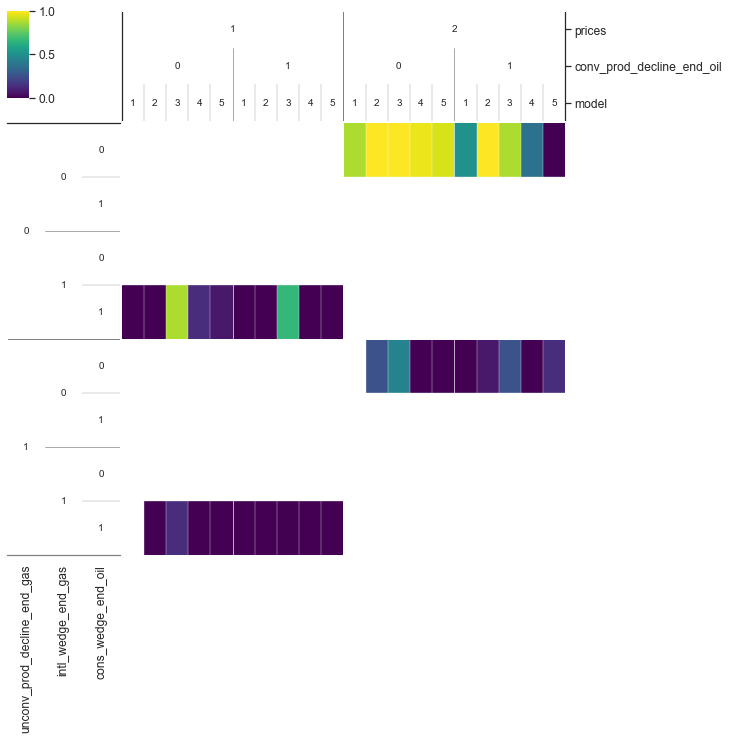

In [45]:
%matplotlib inline

x = experiments
y = (data['gdp_npv_unconv_gas'] >0)&(data['gdp_ft_unconv_gas'] >0)&(data['Unconv_gas_trade balance'] >0)

dimensional_stacking.create_pivot_plot(x,y, 3, nbins=2, categories = True, labels = True)
plt.show()

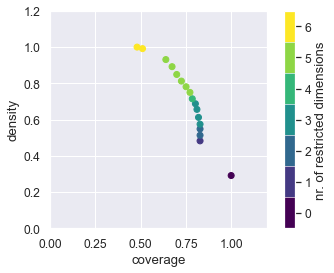

In [47]:
y = (data['gdp_npv_unconv_gas'] >0)&(data['gdp_ft_unconv_gas'] >0)&(data['Unconv_gas_trade balance'] >0)
# y = (data['gdp_npv_unconv_gas'] <0)|(data['gdp_ft_unconv_gas'] <0)|(data['Unconv_gas_trade balance'] <0)
prim_alg = prim.Prim(x, y, threshold=0.05)
box1 = prim_alg.find_box() 

%matplotlib inline
box1.show_tradeoff()
plt.show()

coverage    0.751073
density      0.78125
id                10
mass            0.28
mean         0.78125
res_dim            5
Name: 10, dtype: object

                                box 10             \
                                   min        max   
cons_wedge_end_gas            1.000000   2.250000   
unconv_prod_decline_end_gas   0.001341   0.090302   
well_life                    10.000000  32.000000   
oil_demand_decline_speed      7.000000  28.000000   
conv_prod_decline_end_oil     0.007002   0.119100   

                                                                          
                                                               qp values  
cons_wedge_end_gas                        [-1.0, 1.4384626439924982e-22]  
unconv_prod_decline_end_gas                [-1.0, 2.239911804577674e-07]  
well_life                                    [-1.0, 0.09925084235435429]  
oil_demand_decline_speed     [0.005432432638085243, 0.19612480279579142]  
conv_prod_decline_end_oil  

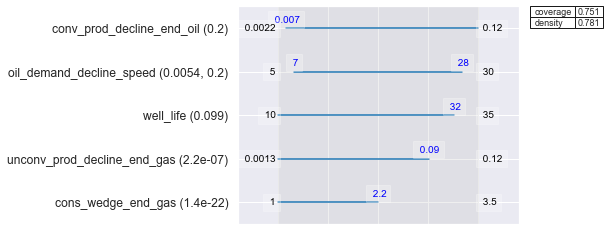

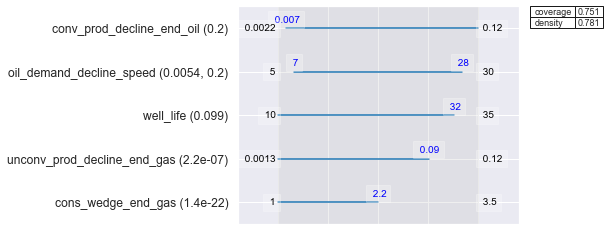

In [48]:
# %matplotlib notebook
box1.inspect(i=10, style='table')
box1.inspect(i=10, style='graph')

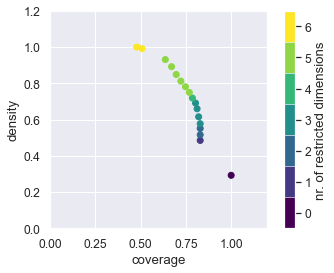

In [49]:
y = (data['gdp_npv_unconv_gas'] >0)&(data['Unconv_gas_trade balance'] >0)
prim_alg = prim.Prim(x, y, threshold=0.15)
box1 = prim_alg.find_box() 

box1.show_tradeoff()
plt.show()

coverage    0.508547
density     0.991667
id                15
mass            0.15
mean        0.991667
res_dim            6
Name: 15, dtype: object

                                                     box 15  \
                                                        min   
cons_wedge_end_gas                                      1.0   
unconv_prod_decline_end_gas                        0.001341   
well_life                                              10.0   
model                        {MESSAGE, GCAM, POLES, REMIND}   
oil_demand_decline_speed                                  7   
conv_prod_decline_end_oil                          0.007002   

                                                             \
                                                        max   
cons_wedge_end_gas                                     2.25   
unconv_prod_decline_end_gas                        0.055225   
well_life                                              32.0   
model                        

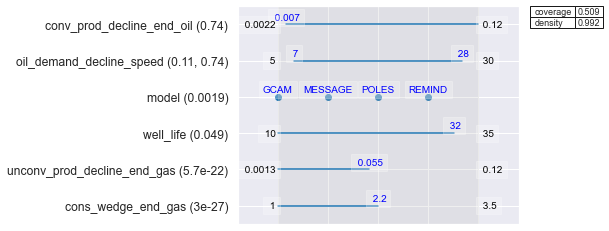

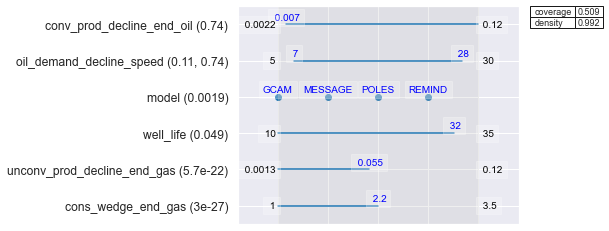

In [50]:
%matplotlib inline
box1.inspect(i=15, style='table')
box1.inspect(i=15, style='graph')

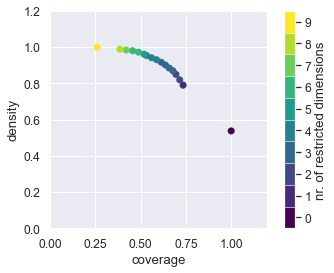

In [51]:
y = (data['gdp_npv_unconv_gas'] >0)&(data['gdp_ft_unconv_gas'] >0)
prim_alg = prim.Prim(x, y, threshold=0.15)
box1 = prim_alg.find_box() 

box1.show_tradeoff()
plt.show()

coverage    0.386047
density     0.988095
id                15
mass            0.21
mean        0.988095
res_dim            8
Name: 15, dtype: object

                               box 15             \
                                  min        max   
cons_wedge_end_gas           1.000000   2.250000   
unconv_prod_decline_end_gas  0.001341   0.091233   
conv_prod_decline_end_oil    0.002250   0.109603   
conv_start_gr_oil            0.078023   0.759772   
oil_opex                     6.040550  19.679709   
gas_demand_decline_speed     6.000000  30.000000   
oil_demand_decline_speed     8.000000  30.000000   
gas_opex                     5.804254  19.858807   

                                                                         
                                                              qp values  
cons_wedge_end_gas                       [-1.0, 1.3658554294969847e-24]  
unconv_prod_decline_end_gas                [-1.0, 2.96721951481502e-07]  
conv_prod_decline_end_oil       

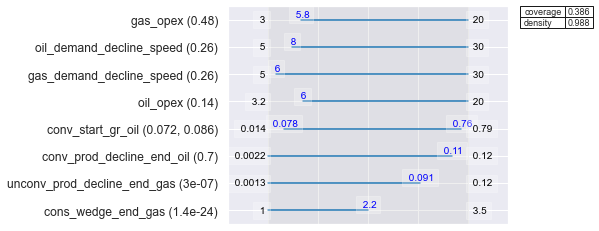

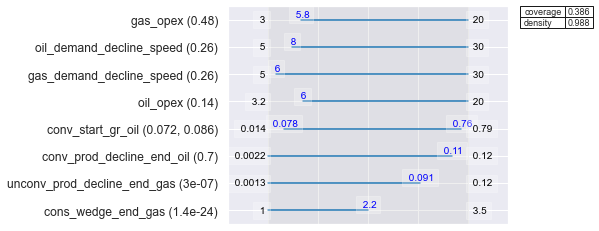

In [52]:
%matplotlib inline
box1.inspect(i=15, style='table')
box1.inspect(i=15, style='graph')

In [56]:
#highly supported - high subsidy rate high subsidy shar
data.loc[(data['public_ds_capex_share'] >data["public_ds_capex_share"].quantile(.5)), 'support'] =0
data.loc[(data['public_ds_capex_share'] <=data["public_ds_capex_share"].quantile(.5)), 'support'] =1

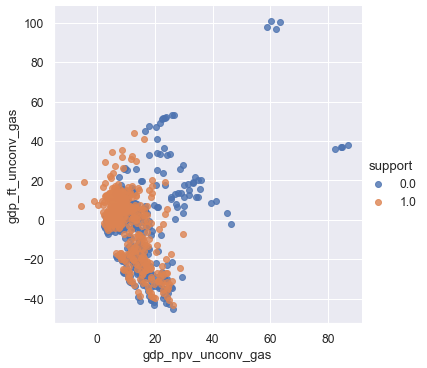

In [57]:
plot = sns.lmplot(x="gdp_npv_unconv_gas", y="gdp_ft_unconv_gas", data=data, fit_reg=False, hue='support', legend=True)
plt.show()

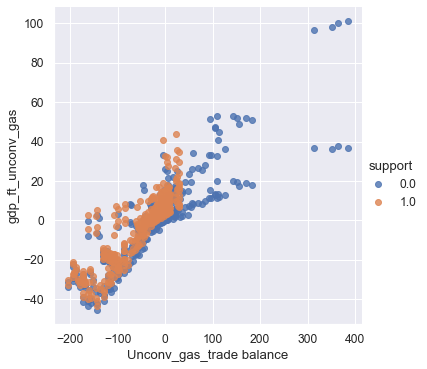

In [58]:
plot = sns.lmplot(x="Unconv_gas_trade balance", y="gdp_ft_unconv_gas", data=data, fit_reg=False, hue='support', legend=True)
plt.show()

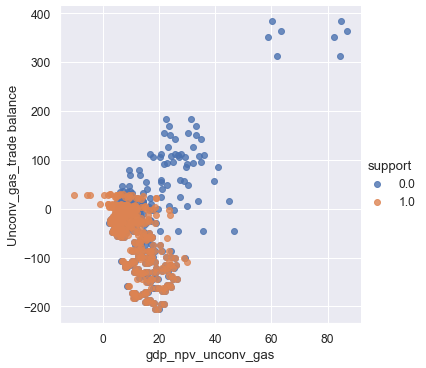

In [59]:
plot = sns.lmplot(x="gdp_npv_unconv_gas", y="Unconv_gas_trade balance", data=data, fit_reg=False, hue='support', legend=True)
plt.show()

In [ ]:
# diverging_colors = sns.color_palette("RdBu", 3)

# plot = sns.lmplot(x="gdp_npv_unconv_gas", y="gdp_ft_unconv_gas", data=data, fit_reg=False, hue="Unconv_gas_trade balance", legend=True)
# plt.show()

In [ ]:
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# z =data['gdp_npv_unconv_gas']
# y =data['gdp_ft_unconv_gas']
# x =data['Unconv_gas_trade balance']

# c = (data['success3']>0)
# ax.scatter(x, y, z, c=c, marker='o')

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

# plt.show()

C:\Users\wb558960\Anaconda3\envs\arg_ccdr\lib\site-packages\ema_workbench\analysis\dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


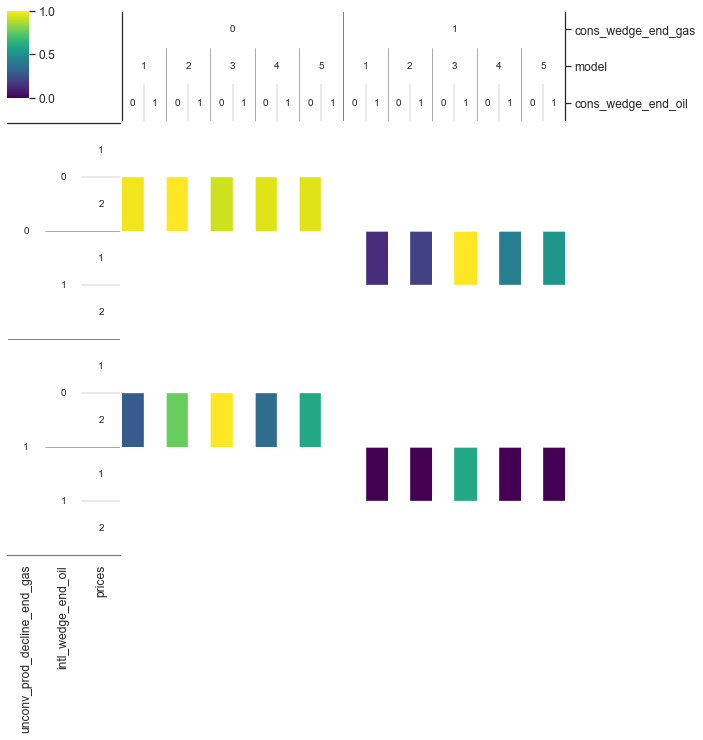

In [60]:
%matplotlib inline
x = experiments
y = (data['gdp_npv_unconv_gas'] >0)&(data['gdp_ft_unconv_gas'] >0)

dimensional_stacking.create_pivot_plot(x,y, 3, nbins=2)
plt.show()

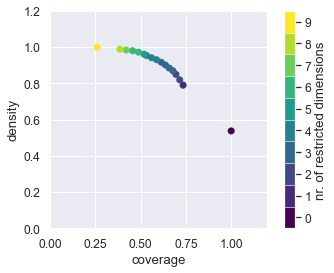

In [61]:
y = (data['gdp_npv_unconv_gas'] >0)&(data['gdp_ft_unconv_gas'] >0)
prim_alg = prim.Prim(x, y, threshold=0.15)
box1 = prim_alg.find_box() 

box1.show_tradeoff()
plt.show()

coverage    0.386047
density     0.988095
id                15
mass            0.21
mean        0.988095
res_dim            8
Name: 15, dtype: object

                               box 15             \
                                  min        max   
cons_wedge_end_gas           1.000000   2.250000   
unconv_prod_decline_end_gas  0.001341   0.091233   
conv_prod_decline_end_oil    0.002250   0.109603   
conv_start_gr_oil            0.078023   0.759772   
oil_opex                     6.040550  19.679709   
gas_demand_decline_speed     6.000000  30.000000   
oil_demand_decline_speed     8.000000  30.000000   
gas_opex                     5.804254  19.858807   

                                                                         
                                                              qp values  
cons_wedge_end_gas                       [-1.0, 1.3658554294969847e-24]  
unconv_prod_decline_end_gas                [-1.0, 2.96721951481502e-07]  
conv_prod_decline_end_oil       

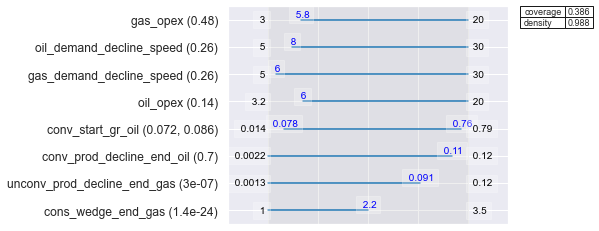

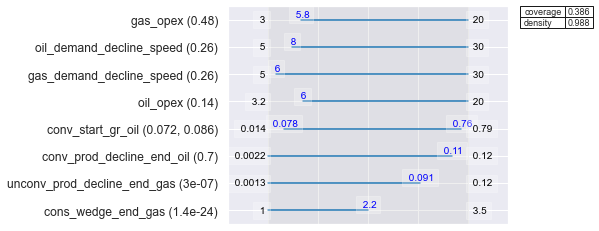

In [62]:
%matplotlib inline
box1.inspect(i=15, style='table')
box1.inspect(i=15, style='graph')

C:\Users\wb558960\Anaconda3\envs\arg_ccdr\lib\site-packages\ema_workbench\analysis\dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


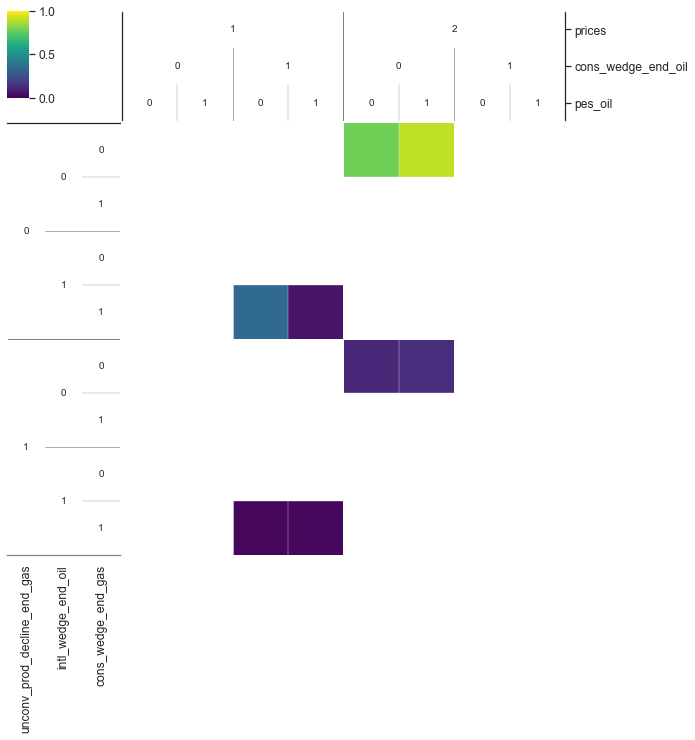

In [63]:
%matplotlib inline
x = experiments
y = (data['Unconv_gas_trade balance'] >0)&(data['gdp_npv_unconv_gas'] >0)

dimensional_stacking.create_pivot_plot(x,y, 3, nbins=2)
plt.show()

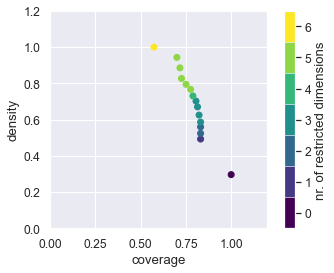

In [64]:
y = (data['Unconv_gas_trade balance'] >0)&(data['gdp_ft_unconv_gas'] >0)
prim_alg = prim.Prim(x, y, threshold=0.15)
box2 = prim_alg.find_box() 

box2.show_tradeoff()
plt.show()

coverage      0.7173
density     0.885417
id                12
mass            0.24
mean        0.885417
res_dim            5
Name: 12, dtype: object

                                box 12             \
                                   min        max   
cons_wedge_end_gas            1.000000   2.250000   
unconv_prod_decline_end_gas   0.001341   0.066634   
well_life                    10.000000  32.000000   
conv_prod_decline_end_oil     0.007002   0.119100   
oil_demand_decline_speed      6.000000  28.000000   

                                                                     
                                                          qp values  
cons_wedge_end_gas                    [-1.0, 2.416025761915891e-25]  
unconv_prod_decline_end_gas           [-1.0, 1.127018047011482e-16]  
well_life                              [-1.0, 0.025126020268226423]  
conv_prod_decline_end_oil               [0.09840110335254815, -1.0]  
oil_demand_decline_speed     [0.556479821225421, 0.556479

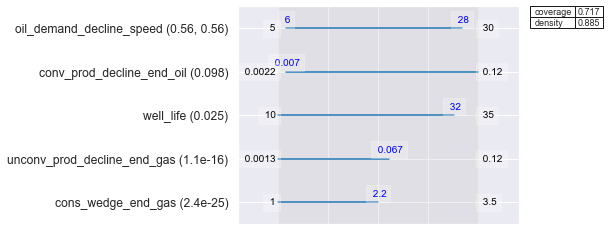

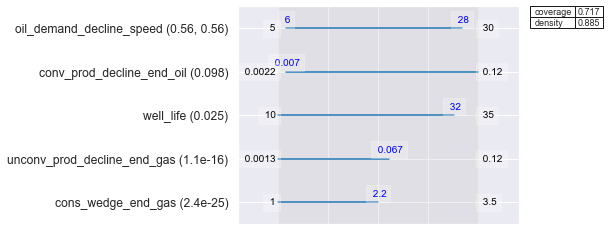

In [67]:
%matplotlib inline
box2.inspect(i=12, style='table')
box2.inspect(i=12, style='graph')

C:\Users\wb558960\Anaconda3\envs\arg_ccdr\lib\site-packages\ema_workbench\analysis\dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


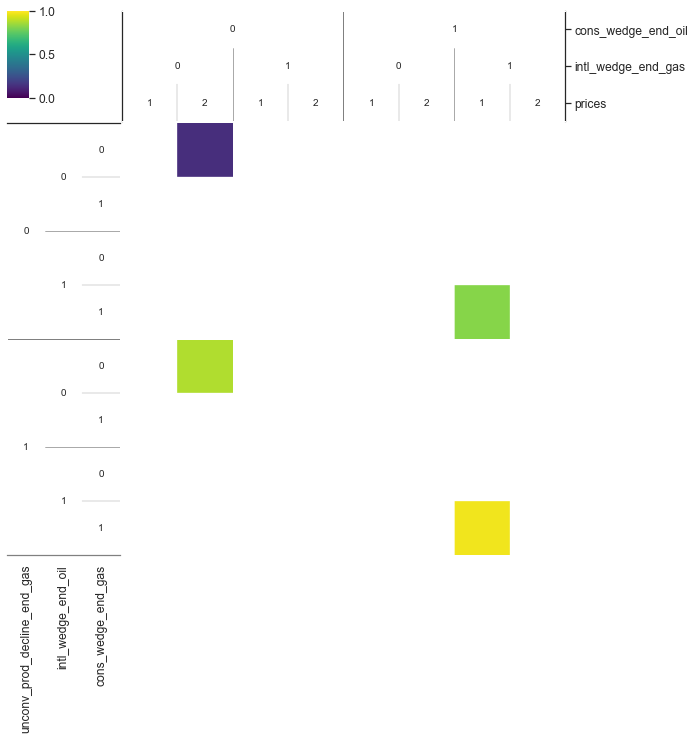

In [70]:
%matplotlib inline
x = experiments
y = (data['Unconv_gas_trade balance'] <0)

dimensional_stacking.create_pivot_plot(x,y, 3, nbins=2)
plt.show()

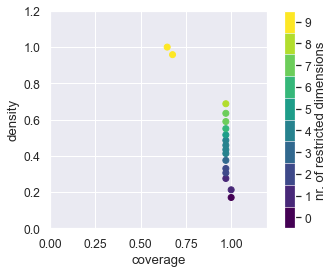

In [72]:
y = (data['Unconv_oil_trade balance'] <0)
prim_alg = prim.Prim(x, y, threshold=0.15)
box6 = prim_alg.find_box() 

box6.show_tradeoff()
plt.show()

coverage    0.676471
density     0.958333
id                15
mass            0.12
mean        0.958333
res_dim            9
Name: 15, dtype: object

                                            box 15                           \
                                               min                      max   
a_gas_trans                                  0.005                   0.0175   
conv_prod_decline_end_gas                 0.001931                 0.105366   
conv_prod_decline_end_oil                  0.00225                 0.117498   
conv_start_gr_oil                         0.014206                 0.737771   
t_rate_e                                 -0.048638                 0.038771   
model                      {REMIND, MESSAGE, GCAM}  {REMIND, MESSAGE, GCAM}   
oil_demand_decline_speed                         6                       25   
gas_demand_decline_speed                         6                       27   
gas_opex                                  4.201477         

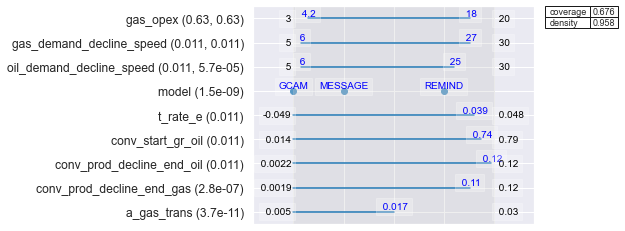

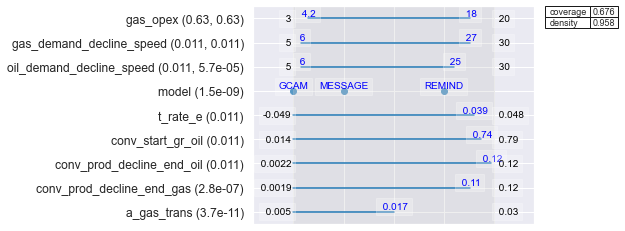

In [76]:
%matplotlib inline
box6.inspect(i=15, style='table')
box6.inspect(i=15, style='graph')

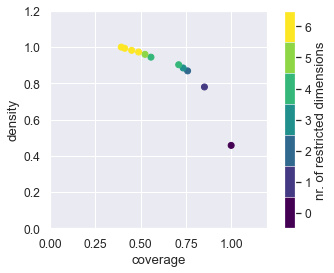

In [79]:
y = (data['gdp_npv_unconv_gas'] <10)
prim_alg = prim.Prim(x, y, threshold=0.15)
box4 = prim_alg.find_box() 

box4.show_tradeoff()
plt.show()

coverage    0.393443
density          1.0
id                10
mass            0.18
mean             1.0
res_dim            6
Name: 10, dtype: object

                                       box 10                      \
                                          min                 max   
cons_wedge_end_gas                        1.0                2.25   
model                      {WB, GCAM, REMIND}  {WB, GCAM, REMIND}   
conv_start_gr_oil                    0.049135            0.786193   
conv_prod_decline_end_gas            0.013911            0.119688   
gas_export_dem_end                   0.084062            0.919715   
us_capex_oil                     3174313.8745         10494396.41   

                                                                        
                                                             qp values  
cons_wedge_end_gas                       [-1.0, 5.802005248870542e-33]  
model                                   [3.0087591257553823e-13, -1.0]  
conv

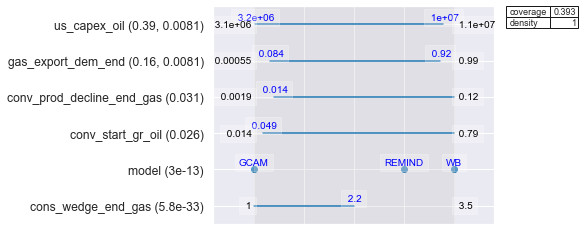

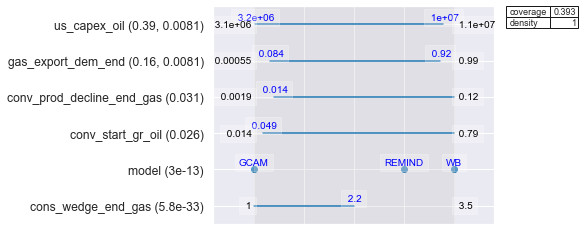

In [80]:
%matplotlib inline
box4.inspect(i=10, style='table')
box4.inspect(i=10, style='graph')

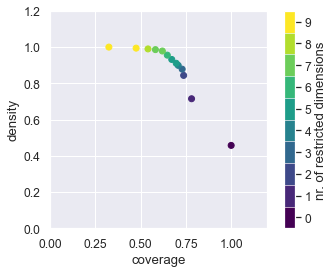

In [81]:
y = (data['gdp_ft_unconv_gas'] <0)
prim_alg = prim.Prim(x, y, threshold=0.15)
box5 = prim_alg.find_box() 

box5.show_tradeoff()
plt.show()

coverage    0.540984
density         0.99
id                10
mass            0.25
mean            0.99
res_dim            8
Name: 10, dtype: object

                                                  box 10  \
                                                     min   
pes_oil                                         0.605985   
oil_opex                                         3.15765   
cons_wedge_end_gas                                  2.25   
model                        {MESSAGE, GCAM, WB, REMIND}   
conv_prod_decline_end_gas                       0.004241   
gas_export_dem_end                              0.084062   
unconv_prod_decline_end_gas                     0.006861   
well_life                                             12   

                                                          \
                                                     max   
pes_oil                                         1.326438   
oil_opex                                       18.532721   
cons_wed

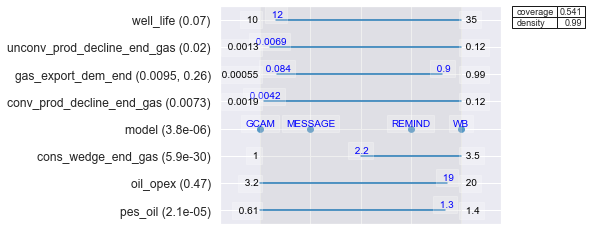

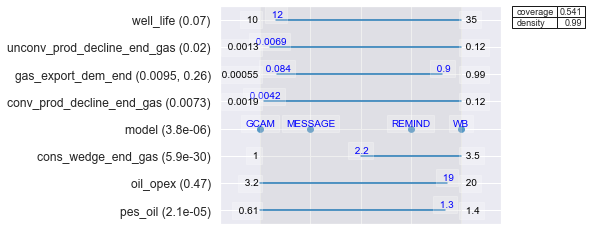

In [82]:
%matplotlib inline
box5.inspect(i=10, style='table')
box5.inspect(i=10, style='graph')

In [83]:
from scipy import stats
crosstab = pd.crosstab(data['success3'],data['support'])
print(crosstab)
stats.chi2_contingency(crosstab)

support           0.0  1.0
success3                  
Negative Impacts  269  298
Positive Impacts  131  102


(4.747522916335506,
 0.02934050098413923,
 1,
 array([[283.5, 283.5],
        [116.5, 116.5]]))

In [84]:
crosstab = pd.crosstab(data['success_tb'],data['support'])
print(crosstab)
stats.chi2_contingency(crosstab)

support     0.0  1.0
success_tb          
0.0         268  298
1.0         132  102


(5.079882818398719,
 0.02420500582654848,
 1,
 array([[283., 283.],
        [117., 117.]]))

In [85]:
crosstab = pd.crosstab(data['success_ft'],data['support'])
print(crosstab)
stats.chi2_contingency(crosstab)

support     0.0  1.0
success_ft          
0.0         198  172
1.0         202  228


(3.1426775612822127,
 0.07626850548399504,
 1,
 array([[185., 185.],
        [215., 215.]]))

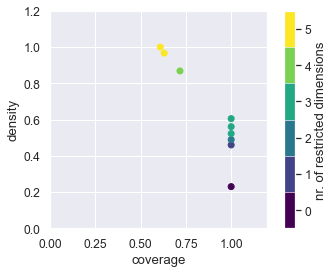

In [86]:
x = experiments
y = (data['Unconv_gas_trade balance'] <-100)
prim_alg = prim.Prim(x, y, threshold=0.15)
box6 = prim_alg.find_box() 

box6.show_tradeoff()
plt.show()

In [ ]:
%matplotlib inline
box6.inspect(i=15, style='table')
box6.inspect(i=15, style='graph')

In [ ]:
x = experiments
y = (data['gdp_npv_unconv_gas'] <-20)
prim_alg = prim.Prim(x, y, threshold=0.15)
box6 = prim_alg.find_box() 

box6.show_tradeoff()
plt.show()

In [ ]:
%matplotlib inline
box6.inspect(i=30, style='table')
box6.inspect(i=30, style='graph')

In [ ]:
x = experiments
y = (data['gdp_ft_unconv_gas'] <0)


prim_alg = prim.Prim(x, y, threshold=0.15)
box6 = prim_alg.find_box() 

box6.show_tradeoff()
plt.show()

In [ ]:
%matplotlib inline
box6.inspect(i=30, style='table')
box6.inspect(i=30, style='graph')

# subset

In [ ]:
param_names =['rcp', 'T_bond_rate','arg_sov_risk','opp_cost_own_finance','share_own_capital','opp_cost_debt',
              'pes_oil','pes_gas','t_rate_gas','t_rate_oil','t_rate_e','us_capex_gas','us_capex_oil',
              'm','oil_opex','gas_opex','share_covered','prod_subsidy_p_ratio','royalty_rate_gas',
              'duty_rate_gas','royalty_rate_oil','duty_rate_oil','price_threshold_gas','price_threshold_oil',
              'price_floor_gas','price_floor_oil','conv_start_gr_gas','conv_start_gr_oil',
              'conv_prod_decline_end_gas','conv_prod_decline_end_oil','unconv_prod_decline_end_gas',
              'unconv_prod_decline_end_oil','cons_wedge_end_gas','cons_wedge_end_oil','intl_wedge_end_gas',
              'intl_wedge_end_oil','a_gas_trans','a_gas_res','a_gas_ind','a_oil_trans','a_oil_res',
              'a_oil_ind','a_el_trans','a_el_res','a_el_ind','well_life','gas_ex_cap_end',
              'gas_ex_cap_increase','oil_ex_cap_end','oil_ex_cap_increase',
              'gas_export_dem_end','oil_export_dem_end',
              'gas_demand_decline_speed','oil_demand_decline_speed','public_ds_capex_share']


In [ ]:
d = data[((data['m']<30000)&
#     (data['unconv_prod_decline_end_gas']<.05)]
    (data['t_rate_gas']<.03))]

In [ ]:
data['subset'] =0
data.loc[(data['m']<30000)&  
         (data['t_rate_gas']<.03),'subset'] = 1
#          (data['unconv_prod_decline_end_gas']<.05),'subset'] = 1

In [ ]:
d.describe()

In [ ]:
x = d[param_names]

In [ ]:
# crosstab = pd.crosstab(d['three_level'],d['support'])
# stats.chi2_contingency(crosstab)

In [ ]:
# plot = sns.lmplot(x="gdp_ft_unconv_gas", y="gdp_npv_unconv_gas", data=d, fit_reg=False, hue='success3', legend=True)
# plt.show()

In [ ]:
# #data_cut.describe()
# pd.crosstab(d['subset'],d['three_level'])

In [ ]:
#graph for executive Summary

d.loc[(d['gdp_npv_unconv_gas'] <0)|(d['gdp_ft_unconv_gas'] <0)|(d['Unconv_gas_trade balance'] <0), 'three_level'] = 0
d.loc[(d['Unconv_gas_trade balance'] >0)&(d['gdp_npv_unconv_gas'] >0), 'three_level'] =1
d.loc[(d['gdp_npv_unconv_gas'] >0)&(d['gdp_ft_unconv_gas'] >0)&(d['Unconv_gas_trade balance'] >0), 'three_level'] =2

sns.set(font_scale = 1.1)
plot = sns.lmplot(x="gdp_npv_unconv_gas", y="gdp_ft_unconv_gas", data=d, fit_reg=False, hue='three_level', legend=True, legend_out = False)
plot.set_titles("Impacts of Vaca Muerta")  # use this argument literally
plot.set_axis_labels(x_var=" Net Present Value (% GDP)", y_var="Net Fiscal Transfers (% GDP)")
# plt.legend(title='Impacts', loc='upper left', labels=['No Positive Impacts', '+ Trade Balance and NPV Impacts','+ Trade Balance, Fiscal, NPV Impacts'])
new_title = 'Impacts'
plot._legend.set_title(new_title)
# replace labels
new_labels = ['No Positive Impacts', '+ Trade Balance, NPV','+ Trade, Fiscal, NPV']
for t, l in zip(plot._legend.texts, new_labels):
    t.set_text(l)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

In [ ]:
sns.set(font_scale = 1.1)
d.loc[(d['gdp_npv_unconv_gas'] <0)|(d['gdp_ft_unconv_gas'] <0)|(d['Unconv_gas_trade balance'] <0), 'three_level'] = 0
d.loc[(d['gdp_ft_unconv_gas'] >0)&(d['gdp_npv_unconv_gas'] >0), 'three_level'] =1
d.loc[(d['gdp_npv_unconv_gas'] >0)&(d['gdp_ft_unconv_gas'] >0)&(d['Unconv_gas_trade balance'] >0), 'three_level'] =2

plot = sns.lmplot(x="gdp_npv_unconv_gas", y="Unconv_gas_trade balance", data=d, fit_reg=False, hue='three_level', legend=True, legend_out = False)
plot.set_titles("Impacts of Vaca Muerta")  # use this argument literally
plot.set_axis_labels(x_var=" Net Present Value (% GDP)", y_var="Net Trade Balance (% GDP)")
# plt.legend(title='Impacts', loc='upper left', labels=['No Positive Impacts', '+ Trade Balance and NPV Impacts','+ Trade Balance, Fiscal, NPV Impacts'])
new_title = 'Impacts'
plot._legend.set_title(new_title)
# replace labels
new_labels = ['No Positive Impacts', '+ Fiscal Transfers, NPV','+ Trade, Fiscal, NPV']
for t, l in zip(plot._legend.texts, new_labels):
    t.set_text(l)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

In [ ]:
# summary = data.loc[(data['subset'] ==1)&(data['Unconv_gas_trade balance'] <-50)]
# # summary.to_csv(outdir+"summary_neg_tb.csv")

In [ ]:
pd.crosstab(d['scenario'],d['success_tb'])
#1839 #588 #32%

In [ ]:
pd.crosstab(d['scenario'],d['success_ft'])
#1839 #303 #16%

In [ ]:
d.loc[(d['wells_total']>10000), 'wells_high'] = 1
d.loc[(d['wells_total']<=10000), 'wells_high'] = 0

data.loc[(data['wells_total']>10000), 'wells_high1'] = 1
data.loc[(data['wells_total']<=10000), 'wells_high1'] = 0


d['wells_high'].describe()
pd.crosstab(d['scenario'],d['wells_high'])

In [ ]:
pd.crosstab(d['scenario'],d['success3'])
#106 #5.7%

In [ ]:
pd.crosstab(d['success3'],d['wells_high'])

In [ ]:
crosstab = pd.crosstab(d['success3'],d['wells_high'])
print(crosstab)
stats.chi2_contingency(crosstab)

In [ ]:
crosstab = pd.crosstab(data['success3'],data['wells_high1'])
print(crosstab)
stats.chi2_contingency(crosstab)

In [ ]:
# pd.crosstab(data['scenario'],data['success3'])

crosstab = pd.crosstab(d['success3'],d['scenario'])
stats.chi2_contingency(crosstab)

In [ ]:
pd.crosstab(d['success3'],d['support'])

In [ ]:
crosstab = pd.crosstab(d['success3'],d['support'])
stats.chi2_contingency(crosstab)

In [ ]:
outcomes = pd.read_csv(indir+"vm_outcomes_2.csv")
experiments = pd.read_csv(indir+"vm_experiments_2.csv")
tradebal= pd.read_csv(indir+"fiscal ts outcomes_2.csv",index_col = False,names = colnames, skiprows = 1 )
physbal = pd.read_csv(indir+"physical ts outcomes_2.csv" )

In [ ]:
y =d['gdp_ft_unconv_gas'] >0
prim_alg = prim.Prim(x, y, threshold=0.1)
box1 = prim_alg.find_box() 

box1.show_tradeoff()
plt.show()

In [ ]:
%matplotlib inline
box1.inspect(i=30, style='table')
box1.inspect(i=30, style='graph')

In [ ]:
%matplotlib inline

y = (d['gdp_ft_unconv_gas'] >0)
dimensional_stacking.create_pivot_plot(x,y, 2, nbins=2)
plt.show()